# Is het verdamping?

In dit experiment is er een verwarmingselement in een met water gevulde maatbeker gestopt. Elke minuut is de temperatuur van het water gemeten. Deze metingen zijn opgeslagen in [tempmetingen.csv](tempmetingen.csv).

Verder is gegeven dat: 
$m_{maatbeker} = 820.8 \mathrm{gr}$  
$m_{maatbeker + water, start} = 1292.9 \mathrm{gr}$  
$m_{maatbeker + water, eind} = 1274.9 \mathrm{gr}$

Het moge duidelijk zijn dat er water is 'verdwenen'. Ook is de eindtemperatuur van het water niet gelijk aan een proces waarbij verdamping en eventuele warmteverliezen niet meegenomen worden. 

```{exercise}
Onderzoek het proces door:
1. De plot van de metingen te maken, inclusief een verwachte trendlijn voor de temperatuur van het water als al de toegevoerde warmte gaat zitten in het water.
2. Bepaal of de totale hoeveelheid toegevoegde energie correspondeert met de opwarming en verdamping van het water, geef daarbij de aannames die je doet.
3. Geef aanbevelingen voor een verbetering van het experiment om (nog) beter het thermodynamische proces te kunnen onderzoeken en beschrijven.
```

0.022579365077340048 K per s aan begin


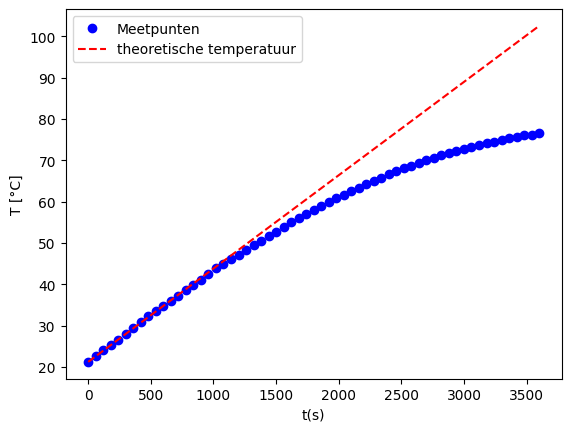

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

mwaterb=(1292.9-820.8)*0.001 #massa water begin kg
mwatere=(1274.9-820.8)*0.001 #massa water eind kg

data=np.loadtxt('tempmetingen.csv',delimiter=";",skiprows=1)
time=data[:,0]*60 #tijd in sec
temp=data[:,1] #temp in celc

def linfit(x,a,b):
    return a*x+b

val, cov=curve_fit(linfit, time[:8], temp[:8] )
print(val[0],"K per s aan begin = deltaT/t")


plt.figure()
plt.xlabel("t(s)")
plt.ylabel("T [°C]")
plt.plot(time,temp, "bo",label='Meetpunten')
plt.plot(time, linfit(time, val[0],val[1]), 'r--',label='theoretische temperatuur')
plt.legend()
plt.show()

In [ ]:
#voor verdamping water is 2260e3 J/kg nodig (bij 100 graden maar het is een benadering)

In [42]:
verdwarm=2260e3 #verdampingswarmte water J/kg bij 100 graden C
cw=4186 #J/(kg*K)
P=mwaterb*cw*val[0] #watt
Etot=P*60*60#totale hoeveelheid joule energie
deltam=mwaterb-mwatere
verdenergie=verdwarm*deltam
energieover=Etot-verdenergie
deltaTmogelijk=energieover/(cw*mwatere)
deltaTecht = np.max(temp)-np.min(temp)

print(Etot,'totale energie gebruikt')
print(verdenergie, "energie nodig om te verdampen")
print(deltaTmogelijk,'delta T in K als de theoretische nodige energie is gebruikt om het water te verdampen')
print(deltaTecht,"werkelijke delta T")


160637.69018559327 totale energie gebruikt
40679.99999999991 energie nodig om te verdampen
63.10697584643589 delta T in K als de theoretische nodige energie is gebruikt om het water te verdampen
55.39999999999999 werkelijke delta T


In [43]:
#Uit het begin van de data is het verband als linear genomen waaruit het vermogen is bepaald.
#in een model zonder verdamping etc zou dit leiden tot een temp boven 100 C.
#De verdampingswarmte voor water bij 100 C is genomen om een benadering te maken van hoeveel energie verbruikt zou zijn aan het verdampen.
#Dit is vergelijken met de totaal gebruikte energie en daaruit is de theoretische delta T bepaald.
#De theoretische delta T van 63 graden komt redelijk overeen met de werkelijke van 55 K.
#Als men ook rekening houd met de hogere verdampingswarmte bij lagere temperaturen, en warmte verlies aan niet perfecte isolatie, kom je dichtbij de werkelijkheid.